In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.0000001]
a = [1]
b = [0.0000001]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

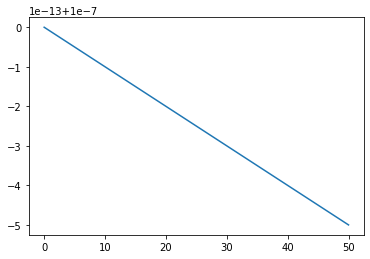

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 50, 0.01)

In [4]:
lambda_dist.rvs(10)

array([25693698.23134845, 14534202.28044277, 12504336.24841683,
        5921579.56332074,  9246986.90871739,  2506797.70117325,
         643564.85738025,  5484445.74684397, 25343408.97945126,
        4024399.04610047])

In [5]:
lmd = lambda_dist.rvs(1)
print(lmd)
w_dist = gen_w_dist(lmd)

[27775552.47950632]


In [6]:
w_dist.rvs(10)

array([[ 0.05013072,  0.57667864, -1.08183882, -0.10380782, -0.40155107],
       [ 0.20831099, -0.22363985, -0.11913275, -0.04271223, -1.12534092],
       [-0.57490187,  0.66824159,  0.99738758,  0.40382696,  0.18098203],
       [ 0.3953003 ,  0.76748831, -0.46061821,  0.38681655,  0.91386303],
       [-0.34138408,  0.94366374,  0.12809804,  0.80613812,  0.13270005],
       [ 0.58947718, -0.94853335,  0.51204386, -0.68167437,  1.18311465],
       [-0.30158496,  1.0932371 ,  1.26538366, -0.53623143,  0.36800838],
       [ 0.98954105, -0.13493044,  0.80804756,  0.692001  , -0.37433967],
       [-0.75211815,  0.78002586,  0.14566221, -0.91762867, -0.33870661],
       [ 0.2163608 , -0.24461655, -0.70767376, -0.22302169, -0.01828446]])

In [7]:
w_dist.cov

array([[0.36002884, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.36002884, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.36002884, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.36002884, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.36002884]])

In [8]:
#data = []
#for i in range(1000):
#    x = (np.random.rand() - 0.5)*10
#    y = x**2 + np.random.randn() + 0.4
    
#    data.append([x,y])

data = data.x_00121 

In [9]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

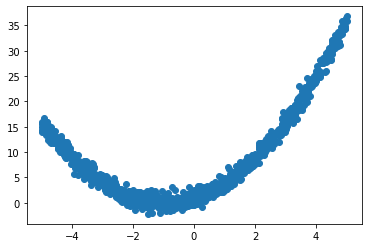

In [10]:
draw_data(data)

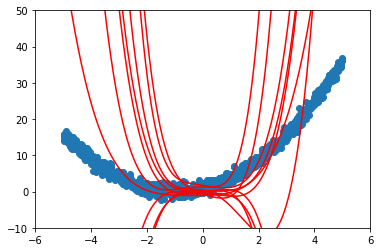

In [11]:
def draw_estimate(data, mus):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for lmd in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-6,6)
    plt.ylim(-10,50)
    plt.show()
   
draw_estimates(10, data)

In [12]:
def update(data):
    i = len(mu)
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
    
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[j][1]*ph_vecs[j] for j in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[i]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[i].T, gauss_lambda[i]) , mu[i] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

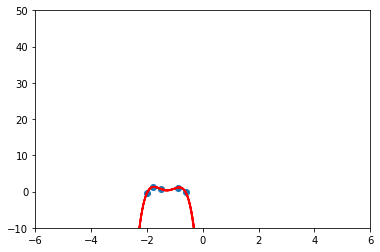

In [13]:
update(data[:5])
draw_estimates(10, data[:5])

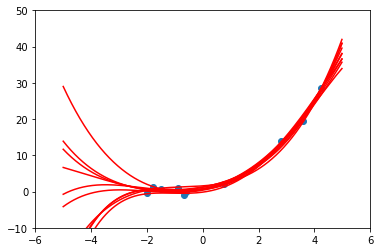

In [14]:
update(data[:10])
draw_estimates(10, data[:10])

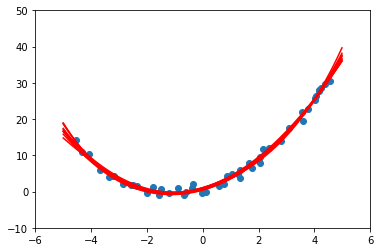

In [15]:
update(data[:50])
draw_estimates(10, data[:50])

In [16]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ -41.46825297],
        [-150.41561499],
        [-191.0816083 ],
        [-102.94305125],
        [ -19.93740859]]),
 array([[ 0.54978189],
        [ 1.13787619],
        [ 0.9005654 ],
        [ 0.13617317],
        [-0.01205038]]),
 array([[ 0.81851948],
        [ 2.16980015],
        [ 0.93727891],
        [-0.00755332],
        [ 0.00539845]])]

In [17]:
a

[1, 3.5, 6.0, 26.0]

In [18]:
b

[1e-07, 0.0036279792040023154, 2.990979610627767, 19.671865774085894]

In [19]:
1/np.sqrt(lmd)

array([0.00018974])

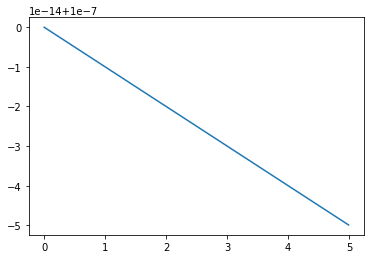

In [20]:
draw(lambda_dist, 0, 5, 0.01)

In [21]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + 2*x + 1.0 + np.random.randn()
    
    data.append([x,y])
    
data

[[-3.577059481302868, 6.4752790355261745],
 [2.282207616344878, 10.643640576664186],
 [0.3368541469596986, 1.3272138739575654],
 [-2.0067228241267254, 1.0296043494395013],
 [3.983601239981379, 25.224179323391954],
 [0.41328677714578266, 2.2229142063387317],
 [1.647558751131838, 6.690465237371655],
 [3.7153410284543043, 22.487327219491004],
 [-0.5821610677363098, -0.45438916606793656],
 [1.579151878477243, 4.866483803850292],
 [2.5492472231025864, 15.204970487386188],
 [2.617951460082991, 13.057378840431952],
 [-0.5891756202432163, 0.31223825880083467],
 [2.6214562450312706, 13.425660224739698],
 [3.2667857447542845, 17.940323789867975],
 [3.473126100996863, 20.601041395654285],
 [1.4152081134535177, 5.9742196604917],
 [-2.806995108149234, 3.4518891899505446],
 [0.5079220047796629, 2.291065609267424],
 [1.0003521175651775, 3.226268847281699],
 [-4.407245606054701, 12.802531493493067],
 [-4.876970513089156, 15.257263290057992],
 [0.8633567632187955, 5.28212026425869],
 [-2.87866683740649